In [1]:
import pandas as pd
import numpy as np

## Introduction to pandas Data Structures

### Series  一列，有index、values,没有列名，追加到DataFrame再声明列名

###### 创建

In [2]:
# 创建1.不传index    # obj.reindex(list)换标签另创建Series //DataFrame也有frame.reindex([])
obj = pd.Series([4,7,-5,3])   # 大写Series
print(obj)   

0    4
1    7
2   -5
3    3
dtype: int64


In [3]:
obj.values 

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
obj.index   # like range(4),默认index

RangeIndex(start=0, stop=4, step=1)

In [5]:
# 创建 2.Series,(list,index)
obj2 = pd.Series([4,7,-5,3],index=['d','b','a','c'])   # 换index,和字典一样的结构
print(obj2)

d    4
b    7
a   -5
c    3
dtype: int64


In [6]:
obj2['a']  # 索引取值

-5

In [7]:
obj2['d'] = 6  # 赋值
obj2[['c','a','d']] # 返回Series

c    3
a   -5
d    6
dtype: int64

In [8]:
obj2[obj2>0]  # bool索引

d    6
b    7
c    3
dtype: int64

In [9]:
obj2 * 2   # 值变索引不变

d    12
b    14
a   -10
c     6
dtype: int64

###### 判断为空
pd.isnull(obj4)

pd.notnull(obj4)

合并：obj3 + obj4 --> 同index相加，不同单独排

In [10]:
# 创建 3.dict
sdata = {'Ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}   
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [11]:
obj4 = pd.Series(sdata,index=['California','Ohio','Oregon','Texas'])
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [12]:
obj3+obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

###### 加标签名和index名

In [14]:
obj4.name = 'Population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: Population, dtype: float64

### DataFrame

#### as a dict of Series all sharing the same index

#### 创建

In [61]:
# 创建1. dict

data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
        'year':[2000,2001,2002,2001,2002,2003],
       'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}
frame = pd.DataFrame(data)  # 大写
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [62]:
frame.head()  # only five rows

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [63]:
pd.DataFrame(data,columns=['year','state','pop'])  #c change index order     columns:列标签//index:行标签

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [64]:
frame.columns   # Return coulmns

Index(['state', 'year', 'pop'], dtype='object')

In [65]:
frame['state']  # 选择一列

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [66]:
frame.state   # 作用同上

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [70]:
frame.loc[3]  #索引取值   #loc[index,colunms]   第三行//创入的是名字，且为[]

frame.loc[:,'state']  #索引取值   #loc[index,colunms]   第三行

frame[:2]['state']   #没有loc的索引，两个[],不能合并,只有loc可以

frame.iloc[:,2]   # 取一列
frame.iloc[2]  # 取一行

state    Ohio
year     2002
pop       3.6
Name: 2, dtype: object

In [20]:
frame.values

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

In [21]:
frame.index  # 返回索引-->可迭代对象

RangeIndex(start=0, stop=6, step=1)

In [55]:
frame.index = ['one','two','three','four','five','six']  # 换标签
frame

,state,year,pop,test,debt
one,Ohio,2000,1.5,6,NaN
two,Ohio,2001,1.7,7,NaN
three,Ohio,2002,3.6,8,NaN
four,Nevada,2001,2.4,9,NaN
five,Nevada,2002,2.9,10,NaN
six,Nevada,2003,3.2,11,NaN


In [58]:
frame['one':'five']['state']  #两个[],不能合并,只有loc可以

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

##### 追加加入一个series

In [25]:
val = pd.Series(range(0,6))   # 不加相同标签
frame['debt'] = val    #[]要加引号['']
frame

,state,year,pop,debt
one,Ohio,2000,1.5,NaN
two,Ohio,2001,1.7,NaN
three,Ohio,2002,3.6,NaN
four,Nevada,2001,2.4,NaN
five,Nevada,2002,2.9,NaN
six,Nevada,2003,3.2,NaN


In [44]:
val = pd.Series(range(0,6),index=['one','two','three','four','five','six'] )
frame['debt'] = val
frame

,state,year,pop,test,debt
0,Ohio,2000,1.5,6,NaN
1,Ohio,2001,1.7,7,NaN
2,Ohio,2002,3.6,8,NaN
3,Nevada,2001,2.4,9,NaN
4,Nevada,2002,2.9,10,NaN
5,Nevada,2003,3.2,11,NaN


In [45]:
val = pd.Series(range(6,12),index=frame.index )  # index非常关键，不加就是NaN
frame['test'] = val
frame

,state,year,pop,test,debt
0,Ohio,2000,1.5,6,NaN
1,Ohio,2001,1.7,7,NaN
2,Ohio,2002,3.6,8,NaN
3,Nevada,2001,2.4,9,NaN
4,Nevada,2002,2.9,10,NaN
5,Nevada,2003,3.2,11,NaN


In [46]:
frame.T  # 转置

,0,1,2,3,4,5
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
year,2000,2001,2002,2001,2002,2003
pop,1.5,1.7,3.6,2.4,2.9,3.2
test,6,7,8,9,10,11
debt,NaN,NaN,NaN,NaN,NaN,NaN


##### 删除行、列

In [28]:
# 删除行
new_frame = frame.drop('two')  # drop(['two','three'])  默认axis=0
new_frame

,state,year,pop,debt
one,Ohio,2000,1.5,0
three,Ohio,2002,3.6,2
four,Nevada,2001,2.4,3
five,Nevada,2002,2.9,4
six,Nevada,2003,3.2,5


In [29]:
new_frame2 = frame.drop('year',axis=1)  # 一次删一列
new_frame2

,state,pop,debt
one,Ohio,1.5,0
two,Ohio,1.7,1
three,Ohio,3.6,2
four,Nevada,2.4,3
five,Nevada,2.9,4
six,Nevada,3.2,5


##### selection

In [30]:
frame['state']  # 选择一列

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [31]:
frame[:2]  # int为行，string为列

,state,year,pop,debt
one,Ohio,2000,1.5,0
two,Ohio,2001,1.7,1


In [32]:
frame[frame['pop']>2.0]  # bool索引

,state,year,pop,debt
three,Ohio,2002,3.6,2
four,Nevada,2001,2.4,3
five,Nevada,2002,2.9,4
six,Nevada,2003,3.2,5


### 不采用下面形式索引，在原frame上索引的话只能用两个[][]   frame[][]
df.loc[val]   # select single row or subset(子集val为list时) of rows from the DataFrame by label

df.loc[:,val]  # select single column or subset of columns by label

df.loc[val1,val2] # select both rows and columns by label

df.iloc[where] # select single row or subset of rows from DataFrame by integer position

df.iloc[:,where] # select single column or subset of columns from DataFrame by integer position

df.iloc[where_i,where_j] # select both rows and column by integer position

##### 函数运用及映射

In [33]:
# 1.NumPy的通用函数(元素级)可以用于操作pandas对象
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(frame)
np.abs(frame)

               b         d         e
Utah   -0.647913  2.030199 -0.987599
Ohio   -1.040549 -0.362089  0.081823
Texas   0.753510 -0.719459  0.867156
Oregon -0.150980 -0.593964 -0.243964


,b,d,e
Utah,0.647913,2.030199,0.987599
Ohio,1.040549,0.362089,0.081823
Texas,0.753510,0.719459,0.867156
Oregon,0.150980,0.593964,0.243964


In [34]:
# 自定义函数并应用到DataFrame
f = lambda x : x.max()-x.min()  
frame.apply(f)   # df.apply(function)   apply操做对象为Series

b    1.794060
d    2.749657
e    1.854755
dtype: float64

In [35]:
frame.apply(f,axis=1)

Utah      3.017798
Ohio      1.122372
Texas     1.586615
Oregon    0.442983
dtype: float64

In [36]:
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
frame.apply(f)

,b,d,e
min,-1.040549,-0.719459,-0.987599
max,0.753510,2.030199,0.867156


In [37]:
# applymap 操做对象为元素
format = lambda x: '%.2f' %x   # 保留2位浮点数
frame.applymap(format)
# 类似frame['e'].map(format)  Series 操做对象为元素

,b,d,e
Utah,-0.65,2.03,-0.99
Ohio,-1.04,-0.36,0.08
Texas,0.75,-0.72,0.87
Oregon,-0.15,-0.59,-0.24


##### 排序

In [38]:
frame3 = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame3.sort_index()   # 默认对行索引进行排序

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [39]:
frame3.sort_index(axis='columns')    #传入axis参数后对列索引进行排序

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


###### 按值排
frame.sort_value(by=lsit,axis=?)

odj.rank() 
#返回排名若传入method='max'参数，则有相同数据时会选择最大的顺序。有两个7，排序为6、7，结果两个都会显示为7。
            # method 参数还有 min、first、average

##### 汇总和计算描述统计

In [40]:
frame.describe()

,b,d,e
count,4.000000,4.000000,4.000000
mean,-0.271483,0.088672,-0.070646
std,0.774230,1.302789,0.768887
min,-1.040549,-0.719459,-0.987599
25%,-0.746072,-0.625337,-0.429873
50%,-0.399447,-0.478026,-0.081071
75%,0.075142,0.235983,0.278156
max,0.753510,2.030199,0.867156


In [41]:
frame.corr()  # 计算相关系数

,b,d,e
b,1.000000,-0.427886,0.654166
d,-0.427886,1.000000,-0.828117
e,0.654166,-0.828117,1.000000


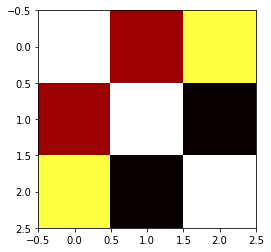

In [45]:
import matplotlib.pyplot as plt
plt.imshow(frame.corr(),cmap='hot')
plt.show()

In [43]:
frame.b.corr(frame.d)  # 计算b和d的相关系数

-0.4278859799316606

In [44]:
frame.cov()   # 计算协方差

,b,d,e
b,0.599432,-0.431591,0.389422
d,-0.431591,1.697259,-0.829523
e,0.389422,-0.829523,0.591187


In [47]:
result = pd.read_csv('D:\Pythoncode\iris.csv',nrows=5)
result

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [71]:
# zip()函数解读：

#这是一个压缩函数，返回一个zip对象
#其.__ next __（）方法返回一个元组，其中第i个元素来自第i个可迭代参数
#.__ next __（）方法一直持续到参数序列中最短的那一列元素耗尽，然后它引发StopIteration（也就是停止迭代）。
zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])
a = zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])
print(a.__next__())
print(a.__next__())
#若要查看压缩包中所有的元素，可以用[*]的方式解压缩
print([*zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])])


#p = np.c_[x,y] #.c_功能类似于zip，不过不是生成组合的元祖，而是生成拼接起来的数组array

(1, 'a', 2)
(2, 'b', 3)
[(1, 'a', 2), (2, 'b', 3), (3, 'c', 4)]


#### 连接

In [10]:
import pandas as pd

data1 = {'state':['Ohio','Ohio','Ohio'],
        'year':[2000,2001,2002],
       'pop':[1.5,1.7,3.6]}
frame1 = pd.DataFrame(data1)  # 大写

data2 =  {'state':['Nevada','Nevada','Nevada'],
        'year':[2001,2002,2003],
       'pop':[2.4,2.9,3.2]}
frame2 = pd.DataFrame(data2)  # 大写

pd.concat([frame1,frame2],axis=0,ignore_index=True)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


#### 写入csv

mode 表示模式

header 表示标签行

index 表示标签列

In [21]:
frame2.to_csv('\read_file\1.csv',mode='a',header=False)

#### 修改某列名

In [23]:
frame2.rename(columns={'year':'年', 'pop':'人口'}, inplace = True)  # 原地修改
frame2

,state,年,人口
0,Nevada,2001,2.4
1,Nevada,2002,2.9
2,Nevada,2003,3.2
